In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab_Notebooks/AdvancedDeepLearningCourse/Session09/StyleTransfer')

In [0]:
import time
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import load_img, img_to_array, save_img
from keras.applications import vgg19
from keras import backend as K
from scipy.optimize import fmin_l_bfgs_b

In [0]:
content_img_path = 'nature.jpg'
style_img_path = 'Pablo_Picasso.jpg'
result_prefix = 'nature_picasso'
iterations = 10

# these are the weights of the different loss components
total_variation_weight = 1.0
style_weight = 1.0
content_weight = 0.025

# dimensions of the generated picture.
width, height = load_img(base_image_path).size
img_nrows = 400
img_ncols = int(width * img_nrows / height)

# layer names
content_layer = 'block5_conv2'

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1',
                'block4_conv1',
                'block5_conv1']

In [0]:
def preprocess_img(img_path):
    # util function to open, resize and format pictures into appropriate tensors
    img = load_img(img_path, target_size=(img_nrows, img_ncols))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = vgg19.preprocess_input(img)
    return img

def deprocess_img(x):
    # util function to convert a tensor into a valid image
    x = x.reshape((img_nrows, img_ncols, 3))
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68

    # 'BGR'->'RGB'
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

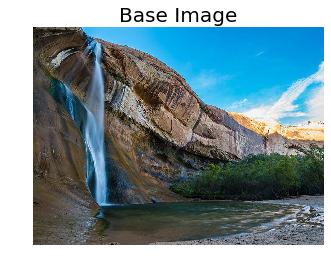

In [10]:
plt.figure()
plt.title('Base Image', fontsize=20)
img = load_img(content_img_path)
plt.axis('off')
plt.imshow(img);

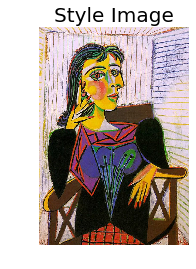

In [12]:
plt.figure()
plt.title('Style Image', fontsize=20)
img = load_img(style_img_path)
plt.axis('off')
plt.imshow(img);

In [0]:
# get tensor representations


In [0]:
# get model


In [0]:
# compute the neural style loss
# first we need to define 4 util functions
# the gram matrix of an image tensor (feature-wise outer product)


In [0]:
# the "style loss" is designed to maintain
# the style of the reference image in the generated image.
# It is based on the gram matrices (which capture style) of
# feature maps from the style reference image
# and from the generated image


In [0]:
# an auxiliary loss function
# designed to maintain the "content" of the
# base image in the generated image



In [0]:
# the 3rd loss function, total variation loss,
# designed to keep the generated image locally coherent


In [0]:
# combine these loss functions into a single scalar

# content loss


# style loss


# total variation loss


In [0]:
# get the gradients of the generated image wrt the loss


In [0]:
# this Evaluator class makes it possible
# to compute loss and gradients in one pass
# while retrieving them via two separate functions,
# "loss" and "grads". This is done because scipy.optimize
# requires separate functions for loss and gradients,
# but computing them separately would be inefficient.



In [0]:
# run scipy-based optimization (L-BFGS) over the pixels of the generated image
# so as to minimize the neural style loss


Start of iteration 0


In [0]:
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
plt.title("Base Image",fontsize=20)
img_content = load_img(content_img_path)
plt.axis('off')
plt.imshow(img_content)

plt.subplot(5,5,1+1)
plt.title("Style Image",fontsize=20)
img_style = load_img(style_img_path)
plt.axis('off')
plt.imshow(img_style)

plt.subplot(5,5,1+2)
plt.title("Final Image",fontsize=20)
plt.axis('off')
plt.imshow(deprocess_img(x.copy()))